## The Chinese Restaurant Process

Imagine an infinitely-sized restaurant. The first customer (we'll call them "1") enters, and the restaurant brings a table out for them to sit. 

Then a second customer (2) enters. For all customers from 2 and onwards (all positive integers from 2), the seating rules are as follows:
* A customer either sits at a seated table 
* A customer sits at a new table

Eventually we'll get a configuration that looks like this (the Chinese Restaurant after 6 people have entered):

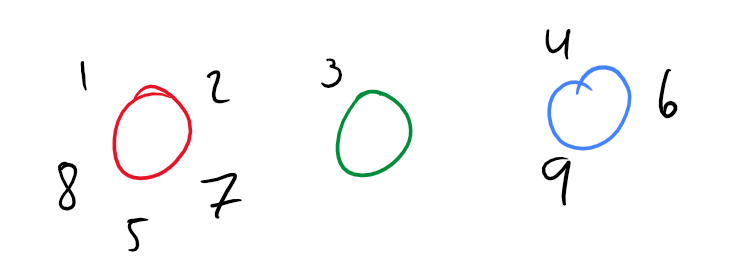

The  probability of a customer sitting at a seated table is $m/n$, m being the number of people at the chosen table and n being the customer number. For example, let's say customers 1 and 2 are at a table, and 3 decides to sit with them. Then the probability of 3 sitting with them is $m/n = 2/3$

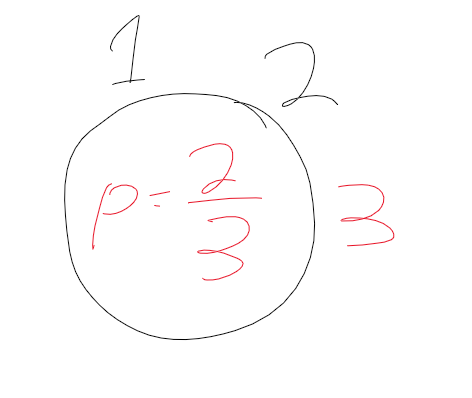

The  probability of a customer sitting at a new table is $1/n$, n being the customer number. For example if customers 1 and 2 are at a table, **but** 3 decides to sit alone, then the probability of 3 sitting at a new table is $1/n = 1/3$
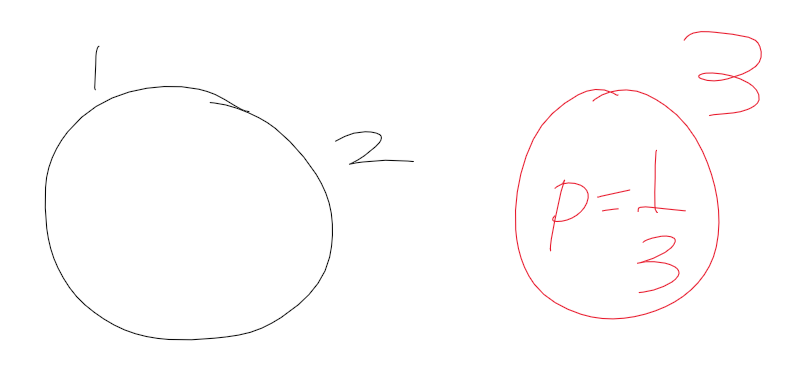

There are a few interesting questions. For example, if we look at the image below, what is the probability of the customers being seated in this particular order?

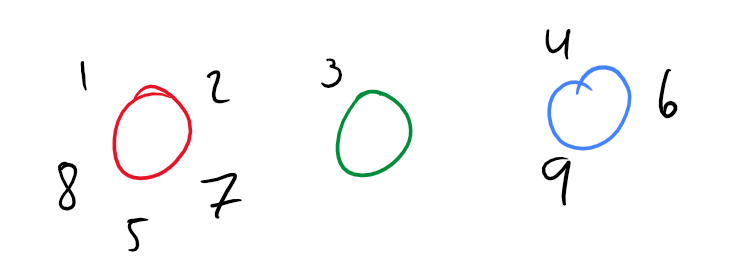

The code below simulates the Chinese Restaurant Process, with any number of customers. The output will describe what the restaurant looks like (each table is a nested list within a big list- that being the restaurant), the number of customers, and the probability of that configuration.

Example of output below:\
`
Restaurant: [[1, 4, 5, 6, 9, 14, 18, 20], [2, 7, 10, 11, 16, 19], [3], [8, 12, 13, 15, 17]]
Customers: 20
numerator: 14515200
denominator: 2432902008176640000
probability of configuration: 5.9662082365900735e-12`


In [1]:
# import random and math modules
import random as rand
import math

In [3]:
# function for sorting customers
def dim_sum2(customers):
    # initialize the list for all the tables
    restaurant = []
        
    # customer 1 enters the restaurant and gets seated.
    restaurant.append([1])
    # have a vector of table sizes?
    table_sizes = [1] # use indexing to update table sizes
        
    # customers 2 to n enter the restuarant
    for c in list(range(2, customers+1)):
        # arguments for rand.choices()
        tables = ["seated", "new"] 
        weights = [c-1, 1] # weights correspond to seated and new table. New table is 1/c, c is # of customers.
        # chooses seated or new table based on weights.
        t = rand.choices(tables, weights, k = 1)[0] 
        
        # customer sits at seated table
        if t == "seated":
            # indexes each restaurant table
            seated_tables = list(range(len(restaurant)))
            # chooses which seated table based on table_sizes as weights
            i = rand.choices(seated_tables, table_sizes, k = 1)[0]
            # adds customer to seated table "i"
            restaurant[i].append(c)
            # updates table size of seated table
            table_sizes[i] = len(restaurant[i])

         # customer sits alone at a new table
        elif t == "new":
            # adds customer to new table
            restaurant.append([c])
            # appends table size of 1 to table_sizes
            table_sizes.append(1)
        
        #everytime we loop, we have to update table sizes. 
    
    return customers, restaurant

# function for calculating the probability
def dim_sum2_prob(r):
    numerator = 1
    denominator = math.factorial(r[0])
    print(f"Restaurant: {r[1]}")
    print(f"Customers: {r[0]}")
    for i in r[1]:
        table = math.factorial(len(i)-1)
        numerator *= table
    print(f"numerator: {numerator}")
    print(f"denominator: {denominator}")
    p = numerator/denominator
    return f"probability of configuration: {p}"

In [5]:
print(dim_sum2_prob(dim_sum2(20)))

Restaurant: [[1, 4, 5, 6, 9, 14, 18, 20], [2, 7, 10, 11, 16, 19], [3], [8, 12, 13, 15, 17]]
Customers: 20
numerator: 14515200
denominator: 2432902008176640000
probability of configuration: 5.9662082365900735e-12


## Old Code

I made a mistake below. Instead of using Chinese Restaurant Process probabilities as weights, I made the chance of choosing a seated or new table a uniform distribution (1:1).

In [2]:
# function for sorting customers
def dim_sum(customers):
    # initialize the list for all the tables
    restaurant = []
        
    # customer 1 enters the restaurant and gets seated.
    restaurant.append([1])
    # have a vector of table sizes?
    # table_sizes = [1]
        
    # customers 2 to n enter the restuarant
    for c in list(range(2, customers+1)):
        choice = rand.randint(0,1) # problem here: didn't take in account actual probabilities!
        # think about using random.choices(tables, weights, k=1)
        # we can determine weights using table sizes. The weights should be:
        # [new table = 1, filled table = c-1].
        
        # customer sits at seated table
        if choice == 0:
            # print("old table")
            r = len(restaurant)
            i = rand.randint(0, r-1) # change that: probability is m/n
            restaurant[i].append(c)

         # customer sits alone at a new table
        elif choice == 1:
            # print("new table")
            restaurant.append([c])
    
    return customers, restaurant

# function for calculating the probability
def dim_sum_prob(r):
    numerator = 1
    denominator = math.factorial(r[0])
    print(f"Restaurant: {r[1]}")
    print(f"Customers: {r[0]}")
    for i in r[1]:
        table = math.factorial(len(i)-1)
        numerator *= table
    print(f"numerator: {numerator}")
    print(f"denominator: {denominator}")
    p = numerator/denominator
    return f"probability of configuration: {p}"

In [8]:
print(dim_sum_prob(dim_sum(20)))

Restaurant: [[1, 2, 5, 7], [3, 4], [6], [8, 12], [9], [10], [11, 15, 19], [13], [14], [16], [17], [18], [20]]
Customers: 20
numerator: 12
denominator: 2432902008176640000
probability of configuration: 4.932381147974598e-18
